In [95]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [96]:
df = pd.read_csv("Twitter_Data.csv")

In [97]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [98]:
df.shape

(162980, 2)

##### Here there are total 1,62,980 observations.

In [99]:
df.category.value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [100]:
df.clean_text.value_counts()

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples                   1
according assam bjp candidate palab lushan das above years age india should get retired from politics also according him modi also takes retired and added that young generation should come for works                               1
lok sabha election 2019 live modi has ignored his own constituency varanasi says priyanka gandhi                                                                                                                                     1
arnab asks modi about opposition saying asat announcement was violation poll code modi says that government can power can make mistakes but congress who has been power for long time should have considered these allegations       1
mrintelligent was claiming that they have attached more than what its worth 

In [101]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,162973.0,0.225436,0.781279,-1.0,0.0,0.0,1.0,1.0


In [102]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [103]:
#we are dropping the null values present in clean_text and category columns as they are not required
df.dropna(axis = 0, inplace =True)

In [104]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

##### Here we can see the null values are reduced to 0.

In [105]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [106]:
#we are label encoding the dataframe by using LabelEncoder library form skLearn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

list_col = list(df.columns)
list_df = []

for i in list_col:
  if df[i].dtype == 'object':
    list_df.append(i)

for i in list_df:
  df[i] = le.fit_transform(df[i])

In [107]:
df.head()

,clean_text,category
0,146309,-1.0
1,119575,0.0
2,143521,1.0
3,13079,1.0
4,10479,1.0


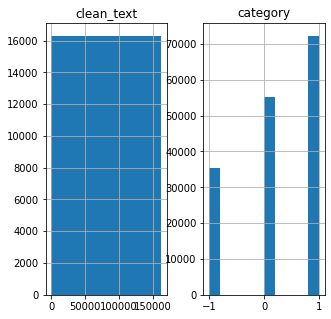

In [108]:
df.hist(figsize=(5,5))
plt.show()

In [109]:
df.corr()

,clean_text,category
clean_text,1.000000,-0.010037
category,-0.010037,1.000000


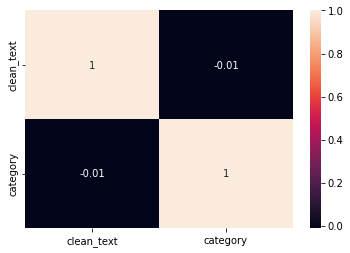

In [110]:
sns.heatmap(df.corr(), annot = True)

# Splitting of Train and Test data

In [111]:
y=df['category']
x=df.drop('category',axis=1)

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [114]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

114078
48891
114078
48891


# ANN

In [115]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size = 10, epochs=20)

Epoch 1/20
11408/11408 [==============================] - 26s 2ms/step - loss: 0.5372 - accuracy: 0.3392
Epoch 2/20
11408/11408 [==============================] - 24s 2ms/step - loss: 0.5344 - accuracy: 0.3392
Epoch 3/20
11408/11408 [==============================] - 24s 2ms/step - loss: 0.5345 - accuracy: 0.3392
Epoch 4/20
11408/11408 [==============================] - 24s 2ms/step - loss: 0.5343 - accuracy: 0.3392
Epoch 5/20
11408/11408 [==============================] - 23s 2ms/step - loss: 0.5344 - accuracy: 0.3392
Epoch 6/20
11408/11408 [==============================] - 22s 2ms/step - loss: 0.5345 - accuracy: 0.3392
Epoch 7/20
11408/11408 [==============================] - 23s 2ms/step - loss: 0.5343 - accuracy: 0.3392
Epoch 8/20
11408/11408 [==============================] - 22s 2ms/step - loss: 0.5344 - accuracy: 0.3392
Epoch 9/20
11408/11408 [==============================] - 24s 2ms/step - loss: 0.5344 - accuracy: 0.3392
Epoch 10/20
11408/11408 [==============================

# Model Implementation

## KNN Classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 2948  3604  4141]
 [ 2543  8219  5757]
 [ 3232  6842 11605]]


In [117]:
print("Training Score:\n",round(knn.score(x_train,y_train)*100))
print("Testing Score:\n",round(knn.score(x_test,y_test)*100))

Training Score:
 61
Testing Score:
 47


## Random forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 3377  3192  4124]
 [ 3191  7301  6027]
 [ 4118  6076 11485]]


In [119]:
print("Training Score:\n",round(rfc.score(x_train,y_train)*100))
print("Test Score:\n",round(rfc.score(x_test,y_test)*100))

Training Score:
 100
Test Score:
 45


## Descision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[   37  1164  9492]
 [   11  2362 14146]
 [   14  2231 19434]]


In [121]:
print("Training Score:\n",round(dtree.score(x_train,y_train)*100))
print("Test Score:\n",round(dtree.score(x_test,y_test)*100))

Training Score:
 45
Test Score:
 45


## AdaBoostClassifier

In [122]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[    0     0 10693]
 [    0     0 16519]
 [    0     0 21679]]


In [123]:
print("Training Score:\n",round(adb.score(x_train,y_train)*100))
print("Test score:\n", round(adb.score(x_test,y_test)*100))

Training Score:
 44
Test score:
 44


## XGBoost Classifier

In [124]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(x_train,y_train)
y_pred = xgb_cl.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[   49   367 10277]
 [    6  1016 15497]
 [   16   652 21011]]


In [125]:
print("Training Score:\n",round(xgb_cl.score(x_train,y_train)*100))
print("Test score:\n", round(xgb_cl.score(x_test,y_test)*100))

Training Score:
 45
Test score:
 45


## Naive Bayes Classifier

In [126]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[    0     0 10693]
 [    0     0 16519]
 [    0     0 21679]]


In [127]:
print("Training Score:\n",round(gnb.score(x_train,y_train)*100))
print("Test score:\n", round(gnb.score(x_test,y_test)*100))

Training Score:
 44
Test score:
 44


# **Final Model Used**

KNN Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [129]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
99958,-1.0,1.0
4009,-1.0,0.0
36171,-1.0,1.0
122983,0.0,1.0
108973,-1.0,1.0
...,...,...
1491,1.0,1.0
106687,1.0,0.0
2502,0.0,1.0
55569,0.0,0.0


In [130]:
data.Predicted.value_counts()

 1.0    21503
 0.0    18665
-1.0     8723
Name: Predicted, dtype: int64

# **Conclusion**

Accuracy Scores of  different models are:







*   KNN Classifier: 47 %
*   Random Forest Classifier: 45 %
*   Descision Tree: 45 %
*   AdaBoost Classifier: 44 %
*   Naive Bayes Classifier: 44 %
*   XGBoost: 45 %









Here, almost all models have same accuracy score for test sets.

But KNN Classifier has the highest of 47%. 